In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [37]:
import warnings
warnings.filterwarnings('ignore')

In [59]:
df = pd.read_csv("data scientist Canada cleaned.csv")

In [12]:
df.columns

Index(['company', 'job title', 'location', 'job description',
       'salary estimate', 'company_size', 'company_type', 'company_sector',
       'company_industry', 'company_founded', 'company_revenue', 'hourly',
       'month', 'rating', 'city', 'age', 'python_needed', 'sas_needed',
       'tableau_needed', 'matlab_needed', 'spark_needed', 'tensorflow_needed',
       'pytorch_needed', 'hadoop_needed', 'job_simp', 'seniority'],
      dtype='object')

In [60]:
df_model = df[['salary estimate','company_size', 'company_type', 'company_sector',
       'company_industry','company_revenue', 'hourly','city','age','python_needed', 'sas_needed',
       'tableau_needed', 'matlab_needed', 'spark_needed', 'tensorflow_needed','pytorch_needed', 'hadoop_needed', 'job_simp', 'seniority']]

In [61]:
df_dum = pd.get_dummies(df_model)

In [62]:
# Get dummy data
df_dum

,salary estimate,hourly,age,python_needed,sas_needed,tableau_needed,matlab_needed,spark_needed,tensorflow_needed,pytorch_needed,...,city_Waterloo,city_Whitehorse,city_Windsor,city_Winnipeg,job_simp_analyst,job_simp_data scientist,job_simp_machine learning engineer,job_simp_na,seniority_junior,seniority_senior
0,92470.0,0,-1,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0
1,58700.0,0,158,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
2,97134.0,0,9,1,0,0,0,1,1,1,...,0,0,0,0,0,1,0,0,1,0
3,106806.0,0,-1,1,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
4,80000.0,0,-1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,77500.0,0,28,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
435,76034.0,0,23,1,0,0,0,0,1,1,...,0,0,0,0,0,0,0,1,1,0
436,92205.0,0,168,1,1,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
437,125000.0,0,-1,0,0,0,1,0,1,0,...,0,0,0,0,0,1,0,0,1,0


In [63]:
# Split train testt
from sklearn.model_selection import train_test_split

In [64]:
X = df_dum.drop('salary estimate', axis = 1)
y = df_dum['salary estimate'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Multiple linear regression

In [22]:
import statsmodels.api as sm

In [23]:
X_sm = sm.add_constant(X)
model = sm.OLS(y,X_sm)
model.fit().summary()
# p<0.05 Variables more important

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     5253.
Date:                Tue, 21 Feb 2023   Prob (F-statistic):               0.00
Time:                        13:05:39   Log-Likelihood:                -3358.2
No. Observations:                 439   AIC:                             6890.
Df Residuals:                     352   BIC:                             7246.
Df Model:                          86                                         
Covariance Type:            nonrobust                                         
==============================================================================================================================
                                                                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------
const                                                       4.899e+04   3751.285     13.060      0.000    4.16e+04    5.64e+04
hourly                                                     -2.436e+04   1500.597    -16.233      0.000   -2.73e+04   -2.14e+04
age                                                         -496.0025    113.943     -4.353      0.000    -720.096    -271.909
python_needed                                              -4177.6270    543.501     -7.687      0.000   -5246.545   -3108.709
sas_needed                                                 -8953.6674   3534.090     -2.534      0.012   -1.59e+04   -2003.080
tableau_needed                                             -1536.5691    713.098     -2.155      0.032   -2939.038    -134.101
matlab_needed                                              -1.707e+04   1738.826     -9.818      0.000   -2.05e+04   -1.37e+04
spark_needed                                               -9582.1601   9935.038     -0.964      0.335   -2.91e+04    9957.339
tensorflow_needed                                            1.22e+04    747.533     16.320      0.000    1.07e+04    1.37e+04
pytorch_needed                                             -5848.6777    621.116     -9.416      0.000   -7070.243   -4627.112
hadoop_needed                                              -1.059e+04   9335.971     -1.135      0.257    -2.9e+04    7767.409
company_size_-1                                            -4555.5199   1623.890     -2.805      0.005   -7749.268   -1361.772
company_size_1 to 50 Employees                             -5646.3925   2887.272     -1.956      0.051   -1.13e+04      32.082
company_size_10000+ Employees                              -4.982e+04   1.37e+04     -3.644      0.000   -7.67e+04   -2.29e+04
company_size_1001 to 5000 Employees                        -4858.0802   8754.184     -0.555      0.579   -2.21e+04    1.24e+04
company_size_201 to 500 Employees                            1.12e+05   9482.700     11.809      0.000    9.33e+04    1.31e+05
company_size_5001 to 10000 Employees                       -4034.1331   5883.880     -0.686      0.493   -1.56e+04    7537.848
company_size_501 to 1000 Employees                         -2.401e+04   5823.388     -4.124      0.000   -3.55e+04   -1.26e+04
company_size_51 to 200 Employees                            6337.7777   8204.187      0.773      0.440   -9797.613    2.25e+04
company_size_Unknown                                        2.361e+04   4127.883      5.719      0.000    1.55e+04    3.17e+04
company_type_-1                                            -4555.5199   1623.890     -2.805      0.005   -7749.268   -1361.772
company_type_College / University  

In [65]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import cross_val_score

In [66]:
lm = LinearRegression()
lm.fit(X_train, y_train)

np.mean(cross_val_score(lm, X_train, y_train, scoring='neg_mean_absolute_error', cv = 4))

-5223.791074082111

#### Lasso Regression

In [39]:
lm_l = Lasso()
np.mean(cross_val_score(lm_l, X_train, y_train, scoring='neg_mean_absolute_error', cv = 4))

-2558.171020435597

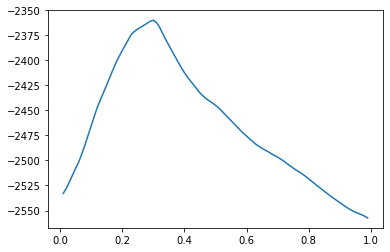

In [38]:
alpha = []
error = []

for i in range(1,100):
    alpha.append(i/100)
    lm_l = Lasso(alpha=(i/100))
    error.append(np.mean(cross_val_score(lm_l, X_train, y_train, scoring='neg_mean_absolute_error', cv = 4)))

plt.plot(alpha,error)

In [ ]:
# Get the best value of alpha

In [42]:
err = tuple(zip(alpha,error))
df_err = pd.DataFrame(err, columns = ['alpha', 'error'])
df_err[df_err.error == max(df_err.error)]

,alpha,error
29,0.3,-2359.813018


In [44]:
lm_l = Lasso(alpha=(0.3))
np.mean(cross_val_score(lm_l, X_train, y_train, scoring='neg_mean_absolute_error', cv = 4))

-2359.813017979844

#### Random Forest Regression

In [45]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [46]:
np.mean(cross_val_score(rf, X_train, y_train, scoring='neg_mean_absolute_error', cv = 4))

-1688.6303797675025

### Tune Models GridSearchCV

In [47]:
from sklearn.model_selection import GridSearchCV

In [48]:
parameters = {'n_estimators':range(10,300,10), 'criterion':('squared_error', 'absolute_error', 'poisson'), 'max_features':('auto', 'sqrt', 'log2')}

In [49]:
gs = GridSearchCV(rf, parameters, scoring='neg_mean_absolute_error', cv=4)

In [50]:
gs.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=RandomForestRegressor(),
             param_grid={'criterion': ('squared_error', 'absolute_error',
                                       'poisson'),
                         'max_features': ('auto', 'sqrt', 'log2'),
                         'n_estimators': range(10, 300, 10)},
             scoring='neg_mean_absolute_error')

In [51]:
gs.best_score_

-1630.4233640282132

In [52]:
gs.best_estimator_

RandomForestRegressor(criterion='poisson', max_features='log2', n_estimators=40)

### Test Ensembles

In [69]:
ypred_lm = lm.predict(X_test)

In [70]:
lm_l = Lasso(alpha=0.3)
lm_l.fit(X_train, y_train)
ypred_lm_l = lm_l.predict(X_test)

In [71]:
ypred_rf = gs.best_estimator_.predict(X_test)

In [72]:
from sklearn.metrics import mean_absolute_error

In [73]:
# Linear Regression
mean_absolute_error(y_test,ypred_lm)

23764.0356684964

In [74]:
# Lasso Regression
mean_absolute_error(y_test,ypred_lm_l)

3211.2753956898364

In [75]:
# Random Forest
mean_absolute_error(y_test,ypred_rf)

2832.4750000000004